# Домашняя работа 4
### Галимов Тимур ПМ23-2

In [67]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import normal_ad

In [68]:
unemployment = [10.6, 9.0, 7.9, 8.2, 7.8, 7.1, 7.1, 6.0, 6.2, 8.3, 7.3, 6.5, 5.5, 5.5, 5.2, 5.6, 5.5, 5.2, 4.8, 4.6, 5.8, 4.8, 4.0, 3.2]
inflation = [20.2, 18.58, 15.06, 11.99, 11.74, 10.91, 9.0, 11.87, 13.28, 8.8, 8.78, 6.1, 6.58, 6.45, 11.36, 12.91, 5.38, 2.52, 4.27, 3.05, 4.91, 8.39, 11.92, 7.42]
years = list(range(2000, 2024))
df = pd.DataFrame({'Год': years, 'Безработица (%)': unemployment, 'Инфляция (%)': inflation})
df

,Год,Безработица (%),Инфляция (%)
0,2000,10.6,20.20
1,2001,9.0,18.58
2,2002,7.9,15.06
3,2003,8.2,11.99
4,2004,7.8,11.74
5,2005,7.1,10.91
6,2006,7.1,9.00
7,2007,6.0,11.87
8,2008,6.2,13.28
9,2009,8.3,8.80


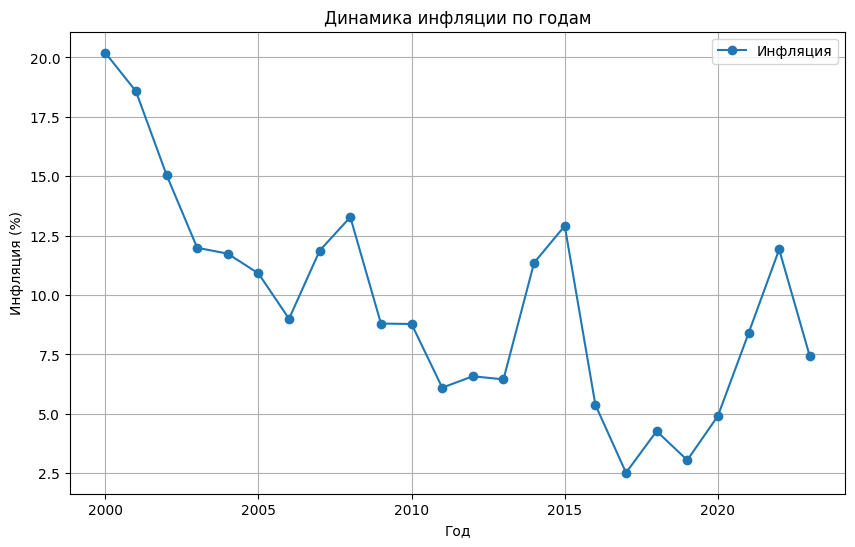

In [76]:
# Построение графика инфляции
plt.figure(figsize=(10, 6))
plt.plot(df['Год'], df['Инфляция (%)'], marker='o', label='Инфляция')
plt.xlabel('Год')
plt.ylabel('Инфляция (%)')
plt.title('Динамика инфляции по годам')
plt.legend()
plt.grid(True)
plt.show()

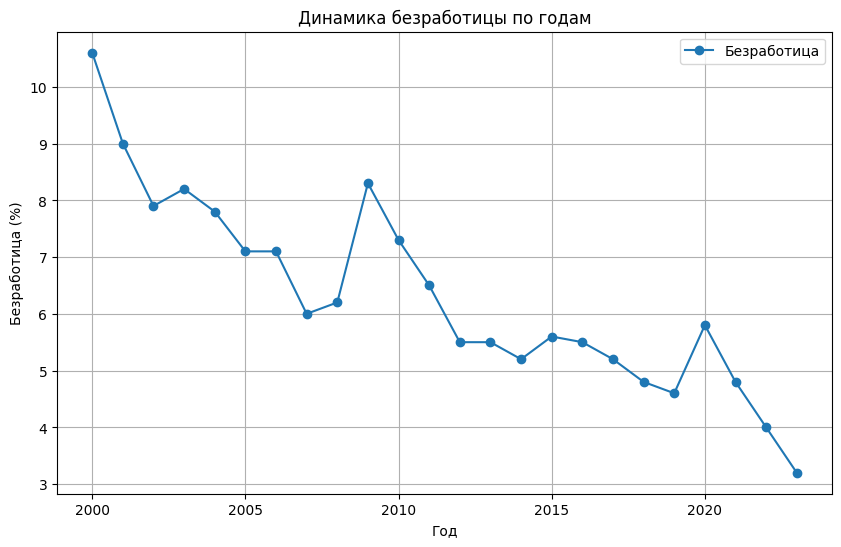

In [77]:
# Построение графика безработицы
plt.figure(figsize=(10, 6))
plt.plot(df['Год'], df['Безработица (%)'], marker='o', label='Безработица')
plt.xlabel('Год')
plt.ylabel('Безработица (%)')
plt.title('Динамика безработицы по годам')
plt.legend()
plt.grid(True)
plt.show()

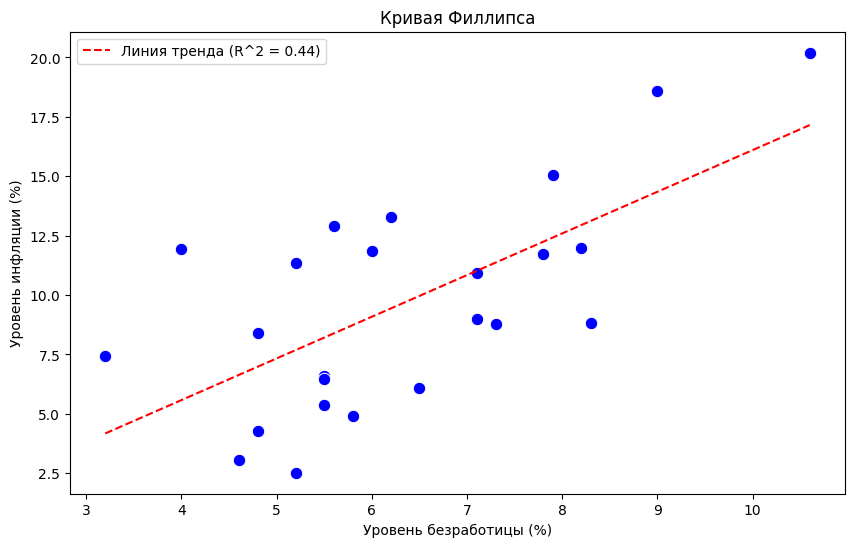

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Безработица (%)", y="Инфляция (%)", data=df, color="blue", s=80)
plt.title("Кривая Филлипса")
plt.xlabel("Уровень безработицы (%)")
plt.ylabel("Уровень инфляции (%)")

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Безработица (%)"], df["Инфляция (%)"])
x_vals = np.linspace(df["Безработица (%)"].min(), df["Безработица (%)"].max(), 100)
y_vals = intercept + slope * x_vals

plt.plot(x_vals, y_vals, color="red", linestyle="--", label=f"Линия тренда (R^2 = {r_value**2:.2f})")
plt.legend()
plt.show()

In [70]:
data = {
    'slope': slope,
    'intercept': intercept,
    'R^2': r_value**2,
    'p_value': p_value,
    'std_err': std_err
}

# Максимальная длина названия параметра
max_param_len = max(len(param) for param in data.keys())

# Форматируем строку для каждого параметра
for param, value in data.items():
    print(f"{param:<{max_param_len + 2}} {value:.4f}")

slope       1.7542
intercept   -1.4433
R^2         0.4419
p_value     0.0004
std_err     0.4203


In [71]:
# Расчёт предсказанных значений
predicted_values = slope * df["Безработица (%)"] + intercept

# Вычисление остатков
residuals = df["Инфляция (%)"] - predicted_values
residuals

0     3.048970
1     4.235665
2     2.645268
3    -0.950988
4    -0.499314
5    -0.101385
6    -2.011385
7     2.788217
8     3.847381
9    -4.316406
10   -2.582222
11   -3.858875
12   -1.624691
13   -1.754691
14    3.681565
15    4.529891
16   -2.824691
17   -5.158435
18   -2.706762
19   -3.575925
20   -3.820946
21    1.413238
22    6.346586
23    3.249933
dtype: float64

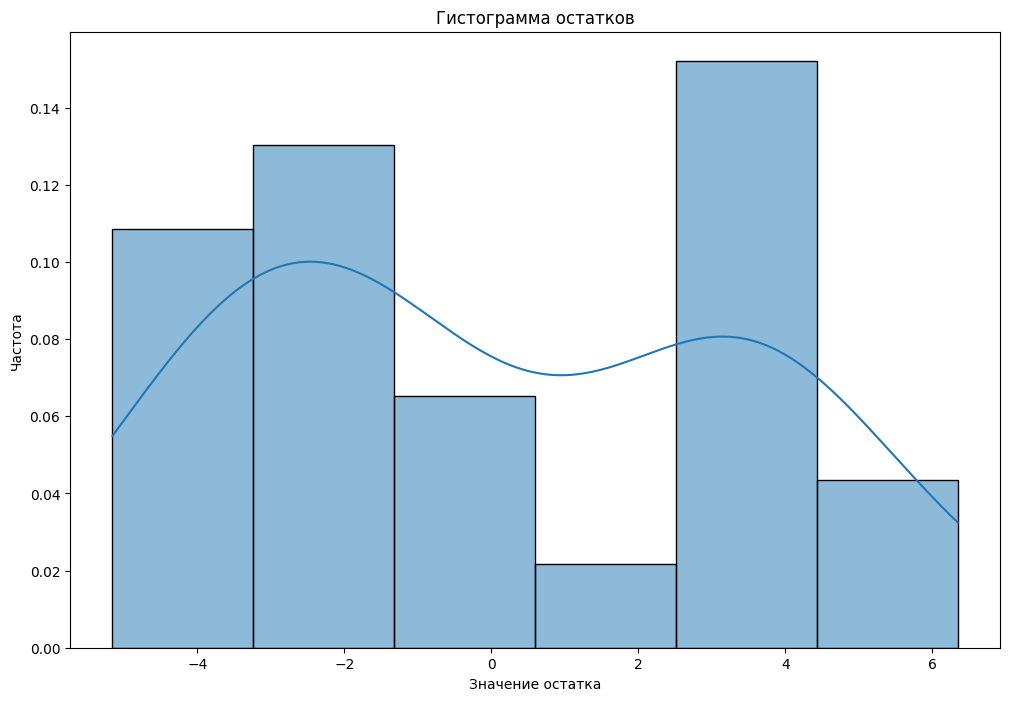

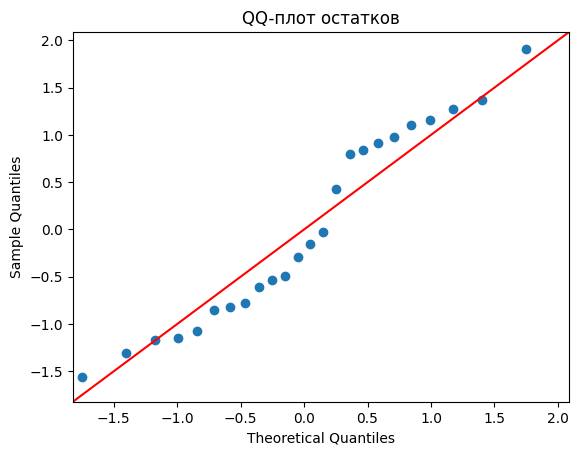

In [72]:
# 1. Визуальный анализ остатков
plt.figure(figsize=(12, 8))
sns.histplot(residuals, stat="density", kde=True)
plt.title('Гистограмма остатков')
plt.xlabel('Значение остатка')
plt.ylabel('Частота')
plt.show()

qq_plot = sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ-плот остатков')
plt.show()

In [73]:
# Тест Шапиро-Уилка
shapiro_test = stats.shapiro(residuals)
print("Тест Шапиро-Уилка:")
print(f'Статистика: {shapiro_test.statistic:.3f}')
print(f'p-значение: {shapiro_test.pvalue:.3f}')
if shapiro_test.pvalue > 0.05:
    print("Гипотеза о нормальности принимается.")
else:
    print("Гипотеза о нормальности отвергается.")

Тест Шапиро-Уилка:
Статистика: 0.932
p-значение: 0.106
Гипотеза о нормальности принимается.


In [74]:
# Тест согласия Хелвига
helwig_test = normal_ad(residuals)
print("\nТест согласия Хелвига:")
print(f'Статистика: {helwig_test[0]:.3f}')
print(f'p-значение: {helwig_test[1]:.3f}')
if helwig_test[1] > 0.05:
    print("Гипотеза о нормальности принимается.")
else:
    print("Гипотеза о нормальности отвергается.")


Тест согласия Хелвига:
Статистика: 0.678
p-значение: 0.067
Гипотеза о нормальности принимается.


In [75]:
# Тест Jarque-Bera
jb_test = stats.jarque_bera(residuals)
print("\nТест Jarque-Bera:")
print(f'Статистика: {jb_test[0]:.3f}')
print(f'p-значение: {jb_test[1]:.3f}')
if jb_test[1] > 0.05:
    print("Гипотеза о нормальности принимается.")
else:
    print("Гипотеза о нормальности отвергается.")


Тест Jarque-Bera:
Статистика: 1.875
p-значение: 0.392
Гипотеза о нормальности принимается.
